In [1]:
#Install missing packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Import csv file
data = pd.read_csv('dados_vendas_sujos.csv')

In [3]:
#Learn about the dataframe 
data.head(2)

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-01-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,05/02/2024,Mouse,Periféricos,80.0,10.0,Bruno,RJ


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Data_Venda      7 non-null      object 
 1   Produto         7 non-null      object 
 2   Categoria       8 non-null      object 
 3   Preco_Unitario  7 non-null      float64
 4   Quantidade      7 non-null      float64
 5   Vendedor        8 non-null      object 
 6   Regiao          8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 580.0+ bytes


In [5]:
data.tail(2)

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
6,2024-06-20,NaN,Tela,950.0,1.0,Ana,MG
7,2024-06-20,Monitor,Tela,900.0,1.0,Ana,MG


In [6]:
#Cleaning data

#Where are the missing values?
data.isnull().sum()

Data_Venda        1
Produto           1
Categoria         0
Preco_Unitario    1
Quantidade        1
Vendedor          0
Regiao            0
dtype: int64

In [7]:
data[data.isnull().any(axis=1)]

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
3,NaN,mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-04-15,Teclado,Periféricos,150.0,NaN,Ana,SP
5,15-05-2024,Monitor,Tela,NaN,2.0,Carlos,SP
6,2024-06-20,NaN,Tela,950.0,1.0,Ana,MG


In [8]:
data.dtypes

Data_Venda         object
Produto            object
Categoria          object
Preco_Unitario    float64
Quantidade        float64
Vendedor           object
Regiao             object
dtype: object

In [9]:
data.loc[3,'Data_Venda'] = '2024-01-15'

In [10]:
data.loc[3]


Data_Venda         2024-01-15
Produto                 mouse
Categoria         Periféricos
Preco_Unitario           85.0
Quantidade                7.0
Vendedor                Bruno
Regiao                     RJ
Name: 3, dtype: object

In [11]:
data = pd.read_csv('dados_vendas_sujos.csv')

In [12]:
data

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-01-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,05/02/2024,Mouse,Periféricos,80.0,10.0,Bruno,RJ
2,2024/03/10,Monitor,Tela,900.0,3.0,Carlos,SP
3,NaN,mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-04-15,Teclado,Periféricos,150.0,NaN,Ana,SP
5,15-05-2024,Monitor,Tela,NaN,2.0,Carlos,SP
6,2024-06-20,NaN,Tela,950.0,1.0,Ana,MG
7,2024-06-20,Monitor,Tela,900.0,1.0,Ana,MG


In [13]:
#Adding missing dates manually
datas_manuais = [
    '2024-01-01', '2024-01-02', '2024-01-03', 
    '2024-01-04', '2024-01-05', '2024-01-06']

In [14]:
print(len(data))

8


In [15]:
datas_manuais = [
    '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08', 
    '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12'
]

data['Data_Venda'] = pd.to_datetime(datas_manuais)

In [16]:
data

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-02-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,2024-02-06,Mouse,Periféricos,80.0,10.0,Bruno,RJ
2,2024-02-07,Monitor,Tela,900.0,3.0,Carlos,SP
3,2024-02-08,mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-02-09,Teclado,Periféricos,150.0,NaN,Ana,SP
5,2024-02-10,Monitor,Tela,NaN,2.0,Carlos,SP
6,2024-02-11,NaN,Tela,950.0,1.0,Ana,MG
7,2024-02-12,Monitor,Tela,900.0,1.0,Ana,MG


In [17]:
#Filling missing product names manually
produtos_manuais = ['Cadeira Gamer']

data.loc[data['Produto'].isnull(), 'Produto'] = produtos_manuais

In [18]:
data

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-02-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,2024-02-06,Mouse,Periféricos,80.0,10.0,Bruno,RJ
2,2024-02-07,Monitor,Tela,900.0,3.0,Carlos,SP
3,2024-02-08,mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-02-09,Teclado,Periféricos,150.0,NaN,Ana,SP
5,2024-02-10,Monitor,Tela,NaN,2.0,Carlos,SP
6,2024-02-11,Cadeira Gamer,Tela,950.0,1.0,Ana,MG
7,2024-02-12,Monitor,Tela,900.0,1.0,Ana,MG


In [19]:
data.at[6, 'Categoria'] = 'Periféricos'

In [20]:
data

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-02-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,2024-02-06,Mouse,Periféricos,80.0,10.0,Bruno,RJ
2,2024-02-07,Monitor,Tela,900.0,3.0,Carlos,SP
3,2024-02-08,mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-02-09,Teclado,Periféricos,150.0,NaN,Ana,SP
5,2024-02-10,Monitor,Tela,NaN,2.0,Carlos,SP
6,2024-02-11,Cadeira Gamer,Periféricos,950.0,1.0,Ana,MG
7,2024-02-12,Monitor,Tela,900.0,1.0,Ana,MG


In [21]:
data.at[5, 'Preco_Unitario'] = 900

In [22]:
data

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-02-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,2024-02-06,Mouse,Periféricos,80.0,10.0,Bruno,RJ
2,2024-02-07,Monitor,Tela,900.0,3.0,Carlos,SP
3,2024-02-08,mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-02-09,Teclado,Periféricos,150.0,NaN,Ana,SP
5,2024-02-10,Monitor,Tela,900.0,2.0,Carlos,SP
6,2024-02-11,Cadeira Gamer,Periféricos,950.0,1.0,Ana,MG
7,2024-02-12,Monitor,Tela,900.0,1.0,Ana,MG


In [23]:
data.at[4, 'Quantidade'] = 2

In [24]:
data

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-02-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,2024-02-06,Mouse,Periféricos,80.0,10.0,Bruno,RJ
2,2024-02-07,Monitor,Tela,900.0,3.0,Carlos,SP
3,2024-02-08,mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-02-09,Teclado,Periféricos,150.0,2.0,Ana,SP
5,2024-02-10,Monitor,Tela,900.0,2.0,Carlos,SP
6,2024-02-11,Cadeira Gamer,Periféricos,950.0,1.0,Ana,MG
7,2024-02-12,Monitor,Tela,900.0,1.0,Ana,MG


In [25]:
#Names out padronized
data['Produto'] = data['Produto'].str.title()
data

,Data_Venda,Produto,Categoria,Preco_Unitario,Quantidade,Vendedor,Regiao
0,2024-02-05,Teclado,Periféricos,150.0,5.0,Ana,SP
1,2024-02-06,Mouse,Periféricos,80.0,10.0,Bruno,RJ
2,2024-02-07,Monitor,Tela,900.0,3.0,Carlos,SP
3,2024-02-08,Mouse,Periféricos,85.0,7.0,Bruno,RJ
4,2024-02-09,Teclado,Periféricos,150.0,2.0,Ana,SP
5,2024-02-10,Monitor,Tela,900.0,2.0,Carlos,SP
6,2024-02-11,Cadeira Gamer,Periféricos,950.0,1.0,Ana,MG
7,2024-02-12,Monitor,Tela,900.0,1.0,Ana,MG


In [26]:
#Calculating revenue
data['Faturamento'] = data['Preco_Unitario'] * data['Quantidade']
print(data['Faturamento'])

0     750.0
1     800.0
2    2700.0
3     595.0
4     300.0
5    1800.0
6     950.0
7     900.0
Name: Faturamento, dtype: float64


In [27]:
#Calculating total sales by region
Vendas_Por_Regiao = data.groupby('Regiao')['Faturamento'].sum()
print(Vendas_Por_Regiao)

Regiao
MG    1850.0
RJ    1395.0
SP    5550.0
Name: Faturamento, dtype: float64


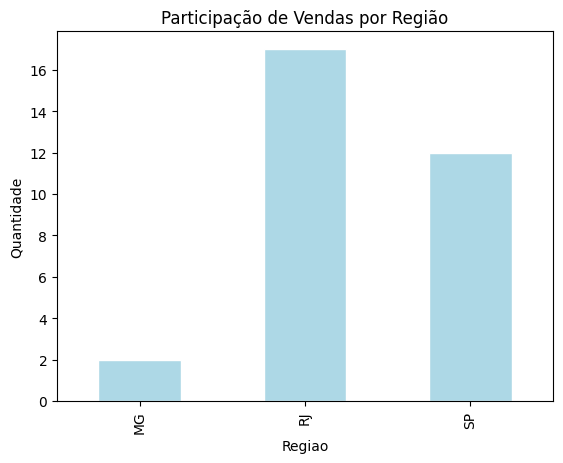

In [28]:
#Plotting sales by region
data.groupby('Regiao')['Quantidade'].sum().plot(kind='bar', color='lightblue', edgecolor='white')
plt.title('Participação de Vendas por Região')
plt.ylabel('Quantidade')
plt.xlabel('Regiao')
plt.show()

In [29]:
#Calculating sales ranking by seller
Ranking_Vendedores = data.groupby('Vendedor')['Quantidade'].sum().sort_values(ascending=False)
print(Ranking_Vendedores)

Vendedor
Bruno     17.0
Ana        9.0
Carlos     5.0
Name: Quantidade, dtype: float64


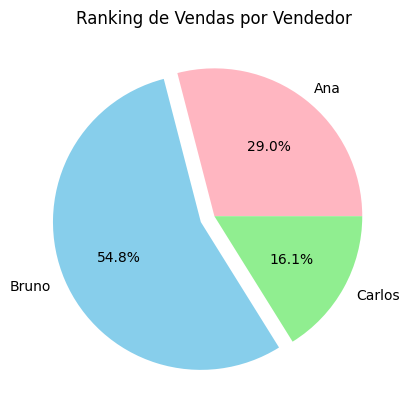

In [30]:
#Graphing sales ranking by seller
cores_personalizadas = ['lightpink', 'skyblue', 'lightgreen']
data.groupby('Vendedor')['Quantidade'].sum().plot(kind='pie', colors=cores_personalizadas, autopct='%1.1f%%', explode=[0, 0.1, 0])
plt.title('Ranking de Vendas por Vendedor')
plt.ylabel('')
plt.show()

In [ ]:
#Exporting cleaned data to excel
data.to_excel('vendas_final_processado.xlsx', index=False)